In [3]:
import networkx as nx
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy.integrate import odeint
import numpy as np
from tqdm import tqdm
import math

In [4]:
SEED = 2024

## Creating the network

In [5]:
def connection_matrix(n,mean,variance):
    J = np.random.normal(loc=mean, scale=np.sqrt(variance), size=(n, n))
    return A

In [6]:
N = 400

J = connection_matrix(N,0,1/N)
J.shape

(400, 400)

## Running the Dynamics

$$\frac{d{x_i}}{dt} = - {x_i} + s*tanh({x_i})$$ 

In [10]:
def neural_network_ODE(values, t, J, s=0.4, g=0.4):

    dvalues_dt = -values + s*np.tanh(values) + g*np.dot(J,np.tanh(values))

    return dvalues_dt

In [11]:
# A_gcc = get_LCC(A)

In [25]:
n_nodes = J.shape[0]
initial_values = np.ones(n_nodes) * 2
print(initial_values.shape)
t = np.arange(0, 20, 0.01)

values = odeint(neural_network_ODE, initial_values, t, args=(J,))

print(values.shape)


(400,)
(2000, 400)


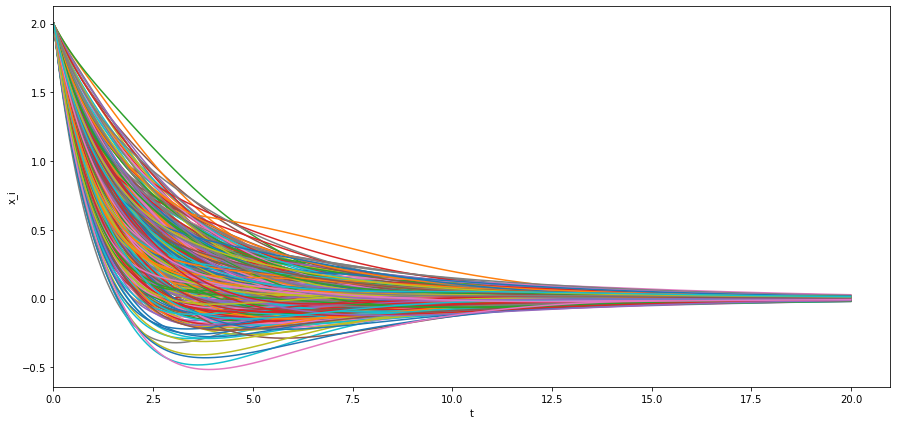

In [26]:
plt.figure(figsize=(15,7))

np.random.seed(SEED)
plot_nodes = np.random.choice(np.arange(values.shape[1]),values.shape[1],replace=False)

plt.plot(t[:], values[:,plot_nodes])
plt.xlim(xmin=0)
plt.xlabel('t')
plt.ylabel('x_i')

plt.title('')

plt.show()

## Removing nodes

In [27]:
def remove_nodes(A, n_rem, seed=SEED):
    if A.shape[0] == 0:
        return A
    
    np.random.seed(seed)
    rem_idx = np.random.choice(np.arange(A.shape[0]), size=n_rem)

    A_rem_row = np.delete(A, rem_idx, 0)
    A_curr = np.delete(A_rem_row, rem_idx, 1)

    return A_curr
    
def get_activity_remnode(A_curr,h=0.01,tf=8):
    t = np.arange(0, tf, h)
    initial_values = np.ones(A_curr.shape[0]) * 2

    values = odeint(neural_network_ODE, initial_values, t, args=(A_curr,))

    return np.mean(values[-1])



In [28]:
f_rem = 0.02
nruns = 2

np.random.seed(SEED)
run_seed = np.random.choice(10000, nruns, replace=False)

In [33]:
activities_nruns = []
F_N = []
N_rem = []
max_iter = J.shape[0]

cuttoff = 0.99
for seed in tqdm(run_seed):
    f_n = 0
    activities = []
    J_ret = J
    remove = False
    i = 0
    
    while (seed==run_seed[0] and f_n < cuttoff) or (seed!=run_seed[0] and i<max_iter):
        if(seed==run_seed[0]):
            n_rem = math.ceil(J_ret.shape[0]*f_rem) if remove else 0
            N_rem.append(n_rem)
        
        J_ret = remove_nodes(J_ret, N_rem[i],seed)
        
        if (J_ret.shape[0]!=0):
            x_avg = get_activity_remnode(J_ret,h=0.01, tf=40)
            activities.append(x_avg)
            
        else:
            activities.append(0)

        remove = True
        i+= 1

        if(seed==run_seed[0]):
            f_n+= N_rem[-1]/ J.shape[0]
            F_N.append(f_n)
            max_iter = i
    
    activities_nruns.append(activities)
    
    

100%|██████████| 2/2 [00:04<00:00,  2.14s/it]


In [34]:
activities_nruns = np.array(activities_nruns)

print(activities_nruns.shape)
print(len(F_N))

(2, 133)
133


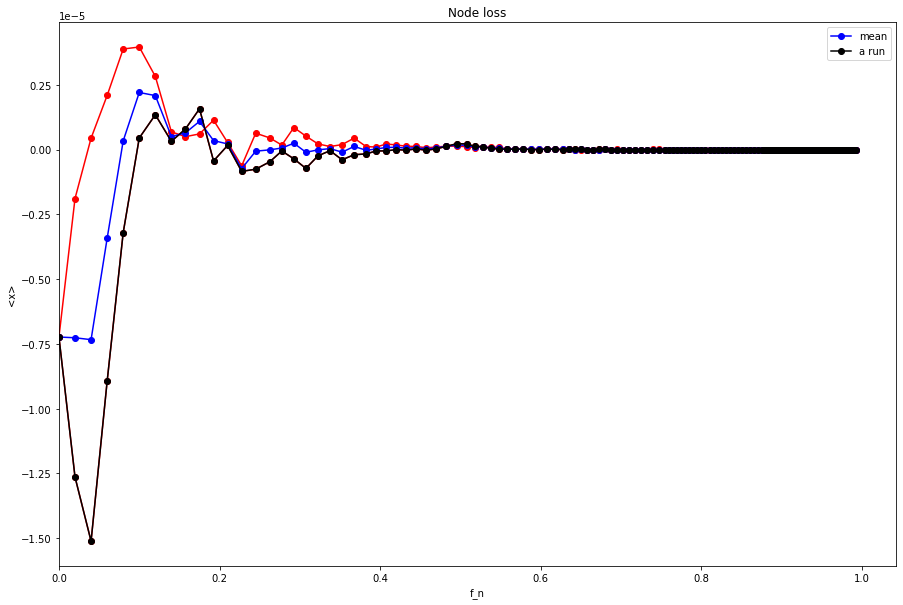

In [35]:
plt.figure(figsize=(15,10))
plt.plot(F_N,activities_nruns.T, 'o-', color='r')
plt.plot(F_N,np.mean(activities_nruns,axis=0), 'o-', color='blue', label='mean')
plt.plot(F_N,activities_nruns[np.random.choice(range(nruns),1)[0]], 'o-', color='black', label='a run')

# plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.xlabel(f'f_n')
plt.ylabel(f'<x>')
plt.title('Node loss')
plt.legend()

plt.show()